In [1]:
import sys
import importlib
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT
import coffea
import awkward as ak
from coffea import processor
from coffea.nanoevents.methods import vector

Welcome to JupyROOT 6.30/07


/cvmfs/cms.cern.ch/el9_amd64_gcc12/lcg/root/6.30.07-024df6516c17fd2edef848a927a788f1/lib/ROOT/_facade.py:154: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  return _orig_ihook(name, *args, **kwds)
/cvmfs/cms.cern.ch/el8_amd64_gcc12/external/py3-numpy/1.24.3-0831476b9e4ddf0b4b9eb1f4c971c0d1/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, w

In [2]:
import dask_awkward as dak

In [3]:
#sys.path.insert(0,"../python/HNL_Plotting_HelperFunctions")
import MuonSystemReader
import HNL_Processor


In [4]:
importlib.reload(MuonSystemReader)
importlib.reload(HNL_Processor)

<module 'HNL_Processor' from '/uscms/home/amalbert/nobackup/el9_work/CMSSW_14_1_0_pre4/src/run3_llp_analyzer/python/HNL_Plotting_HelperFunctions/HNL_Processor.py'>

In [5]:
HNL_2GeV_10ctau_path = "promptHNL_testTauKinematics.root"

signal_events  = MuonSystemReader.loadTree_nanoFactory(HNL_2GeV_10ctau_path)


[32.4, 24.7, 28.2, 21.2, 26.9, 21.6, ..., 30.8, 37.4, 18.2, 29, 19.4, 24.2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


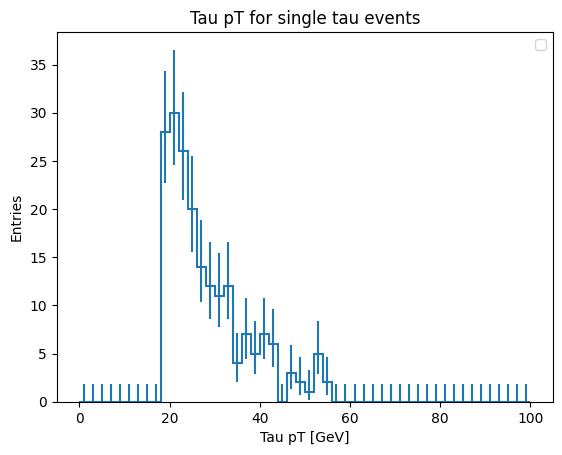

In [6]:
processor = HNL_Processor.HNL_Processor()
output = processor.process(signal_events)
h = output["tauPt"]
h.plot()
plt.title("Tau pT for single tau events")
plt.ylabel("Entries")
plt.legend()
plt.show()